In [ ]:
pip install pandas matplotlib seaborn

Loaded in the dataset from the US census showing US rental vacancy rates and homeownership rates



In [ ]:
# upload the data
import pandas as pd
from google.colab import files
uploaded = files.upload()

file_name = 'tab1.xlsx'
vacancy_data = pd.read_excel(file_name, sheet_name='Table 1', skiprows=4, header=[0, 1])
print(vacancy_data.head())

                Year Rental Vacancy Rates                     \
  Unnamed: 0_level_1   Unnamed: 1_level_1 Unnamed: 2_level_1   
0                NaN        First Quarter    Second Quarter    
1                NaN                  NaN                NaN   
2                NaN                  NaN                NaN   
3   2024...…………..…….                  6.6                6.6   
4   2023...…………..…….                  6.4                6.3   

                                        Homeowner Vacancy Rates  \
  Unnamed: 3_level_1 Unnamed: 4_level_1      Unnamed: 5_level_1   
0      Third Quarter     Fourth Quarter           First Quarter   
1                NaN                NaN                     NaN   
2                NaN                NaN                     NaN   
3                6.9                6.9                     0.8   
4                6.6                6.6                     0.8   

                                                            
  Unnamed: 6_level_1

Started the dataset cleaning process

In [ ]:
# Create new columns
vacancy_data.columns = ['Year',
                'Rental Q1', 'Rental Q2', 'Rental Q3', 'Rental Q4',
                'Homeowner Q1', 'Homeowner Q2', 'Homeowner Q3', 'Homeowner Q4']

print(vacancy_data.head())

               Year      Rental Q1        Rental Q2      Rental Q3  \
0               NaN  First Quarter  Second Quarter   Third Quarter   
1               NaN            NaN              NaN            NaN   
2               NaN            NaN              NaN            NaN   
3  2024...…………..…….            6.6              6.6            6.9   
4  2023...…………..…….            6.4              6.3            6.6   

        Rental Q4   Homeowner Q1     Homeowner Q2   Homeowner Q3  \
0  Fourth Quarter  First Quarter  Second Quarter   Third Quarter   
1             NaN            NaN              NaN            NaN   
2             NaN            NaN              NaN            NaN   
3             6.9            0.8              0.9              1   
4             6.6            0.8              0.7            0.8   

     Homeowner Q4  
0  Fourth Quarter  
1             NaN  
2             NaN  
3             1.1  
4             0.9  


In [ ]:
# drop n/a in dataset
vacancy_data.dropna(subset=['Year'], inplace=True)

vacancy_data.reset_index(drop=True, inplace=True)

print(vacancy_data.head())

               Year Rental Q1 Rental Q2 Rental Q3 Rental Q4 Homeowner Q1  \
0  2024...…………..…….       6.6       6.6       6.9       6.9          0.8   
1  2023...…………..…….       6.4       6.3       6.6       6.6          0.8   
2  2022...…………..…….       5.8       5.6         6       5.8          0.8   
3  2021...…………..…….       6.8       6.2       5.8       5.6          0.9   
4  2020...…………..…….       6.6       5.7       6.4       6.5          1.1   

  Homeowner Q2 Homeowner Q3 Homeowner Q4  
0          0.9            1          1.1  
1          0.7          0.8          0.9  
2          0.8          0.9          0.8  
3          0.9          0.9          0.9  
4          0.9          0.9            1  


In [ ]:
# created the column quarter
vacancy_data_2 = pd.melt(vacancy_data, id_vars=['Year'],
                    value_vars=['Rental Q1', 'Rental Q2', 'Rental Q3', 'Rental Q4',
                                'Homeowner Q1', 'Homeowner Q2', 'Homeowner Q3', 'Homeowner Q4'],
                    var_name='Quarter', value_name='Rate')

vacancy_data_2[['Type', 'Quarter']] = vacancy_data_2['Quarter'].str.split(' ', expand=True)

print(vacancy_data_2.head())

               Year Quarter Rate    Type
0  2024...…………..…….      Q1  6.6  Rental
1  2023...…………..…….      Q1  6.4  Rental
2  2022...…………..…….      Q1  5.8  Rental
3  2021...…………..…….      Q1  6.8  Rental
4  2020...…………..…….      Q1  6.6  Rental


In [ ]:
# Take just the first 4 characters (if format is always '2024...')
# First inspect the problematic values
print("Problematic values before cleaning:")
print(vacancy_data_2[vacancy_data_2['Year'].str.contains(r'[^0-9]', na=True)])

# Step 1: Extract just the 4-digit year (returns NaN for non-matches)
years_extracted = vacancy_data_2['Year'].str.extract(r'(\d{4})', expand=False)

# Step 2: Convert to numeric (coerce errors to NaN)
vacancy_data_2['Year'] = pd.to_numeric(years_extracted, errors='coerce')

# Step 3: Drop rows with invalid/missing years if needed
vacancy_data_2 = vacancy_data_2.dropna(subset=['Year'])

# Step 4: Convert to integer
vacancy_data_2['Year'] = vacancy_data_2['Year'].astype(int)

# Verify
print("\nCleaned data:")
print(vacancy_data_2.head())
print("\nYear value counts:")
print(vacancy_data_2['Year'].value_counts().sort_index())

Problematic values before cleaning:
                                                  Year Quarter Rate       Type
0                                     2024...…………..…….      Q1  6.6     Rental
1                                     2023...…………..…….      Q1  6.4     Rental
2                                     2022...…………..…….      Q1  5.8     Rental
3                                     2021...…………..…….      Q1  6.8     Rental
4                                     2020...…………..…….      Q1  6.6     Rental
..                                                 ...     ...  ...        ...
555               r1 Revised based on the 2000 Census.      Q4  NaN  Homeowner
556               r2 Revised based on the 1990 Census.      Q4  NaN  Homeowner
557  r3 Revised to include year-round vacant mobile...      Q4  NaN  Homeowner
558  r4 Revised to reflect changes made in 1980. Se...      Q4  NaN  Homeowner
559  Source: U.S. Census Bureau, Current Population...      Q4  NaN  Homeowner

[560 rows x 4 c

<ipython-input-7-96e4f98e2915>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacancy_data_2['Year'] = vacancy_data_2['Year'].astype(int)


Visualization for rental vacancy rates over the last 70 years

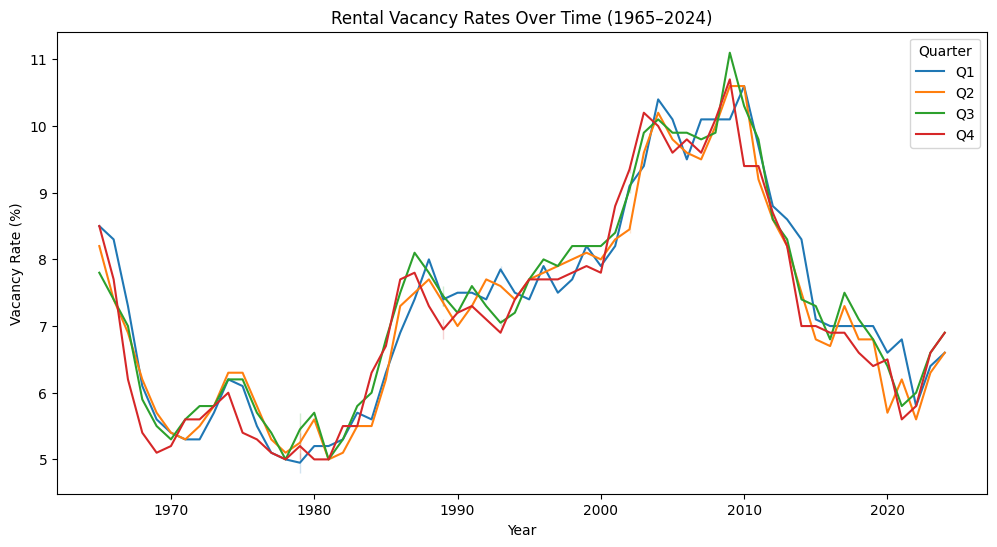

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Rental data only
rental_data = vacancy_data_2[vacancy_data_2['Type'] == 'Rental']

# line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=rental_data,
    x='Year',          # X-axis: Year
    y='Rate',          # Y-axis: Vacancy Rate
    hue='Quarter',     # Color lines by quarter
    palette='tab10'    # Used a color palette
)

# plot labels
plt.title('Rental Vacancy Rates Over Time (1965–2024)')
plt.xlabel('Year')
plt.ylabel('Vacancy Rate (%)')
plt.legend(title='Quarter')

plt.show()  # Display the plot

Uploaded the data showing construction permits being approved in the US

In [ ]:
import pandas as pd

# Read the Excel file without any processing
raw_df = pd.read_excel('newresconst.xlsx')

# Print the first 10 rows to see the actual structure
print(raw_df.head(10))

# Print all column names
print("\nColumn names:", raw_df.columns.tolist())

  New Privately-Owned Housing Units Authorized in Permit-Issuing Places  \
0  (Thousands of Units.  Detail may not add to to...                      
1                                                NaN                      
2         Table 1a - Seasonally adjusted annual rate                      
3                                             Period                      
4                                                NaN                      
5                                                NaN                      
6                                               2023                      
7  December . . . . . . . . . . . . . . . . . . ....                      
8                                                NaN                      
9                                               2024                      

      Unnamed: 1 Unnamed: 2    Unnamed: 3         Unnamed: 4 Unnamed: 5  \
0            NaN        NaN           NaN                NaN        NaN   
1            NaN        

Data cleaning for new residential construction dataset

In [ ]:
# Read the file, skipping metadata rows
df = pd.read_excel('newresconst.xlsx', skiprows=4)

# Clean column names (remove extra spaces and newlines)
df.columns = [col.strip().replace('\n', ' ') for col in df.columns]

# Find which column contains the period data (looking for 'Period' or month names)
period_col = None
for col in df.columns:
    if 'period' in col.lower() or any(month in col.lower() for month in ['jan', 'feb', 'mar']):
        period_col = col
        break

if period_col is None:
    period_col = df.columns[0]

# Rename the period column
df = df.rename(columns={period_col: 'Period'})

# Clean the Period column (keep only month abbreviations)
df['Period'] = df['Period'].str.strip().str[:3]  # Takes first 3 characters

# Drop any completely empty rows
df = df.dropna(how='all')

# Region columns
region_columns = {
    'Northeast': ['Northeast', 'NE'],
    'Midwest': ['Midwest', 'MW'],
    'South': ['South', 'S'],
    'West': ['West', 'W']
}

# Function to find matching columns
def find_columns(patterns):
    matches = []
    for col in df.columns:
        for pattern in patterns:
            if pattern.lower() in col.lower():
                matches.append(col)
                break
    return matches

# Clean dataframe
clean_data = {'Period': df['Period']}
for region, patterns in region_columns.items():
    cols = find_columns(patterns)
    if cols:
        clean_data[region] = df[cols[0]]

clean_df = pd.DataFrame(clean_data)

# Display the cleaned data
print(clean_df.head(12))

   Period Northeast Midwest  South   West
0     NaN     Total   Total  Total  Total
3     Dec       129     203   1530    203
6     Jan       147     213   1508    213
7     Feb       214     237   1563    237
8     Mar       146     204   1485    204
9     Apr       152     166   1440    166
10    May       120     180   1399    180
11    Jun       117     207   1454    207
12    Jul       141     184   1406    184
13    Aug       145     206   1470    206
14    Sep       127     201   1425    201
15    Oct       142     196   1419    196


Tried to clean the data Kept running into trouble decided to manually input the data

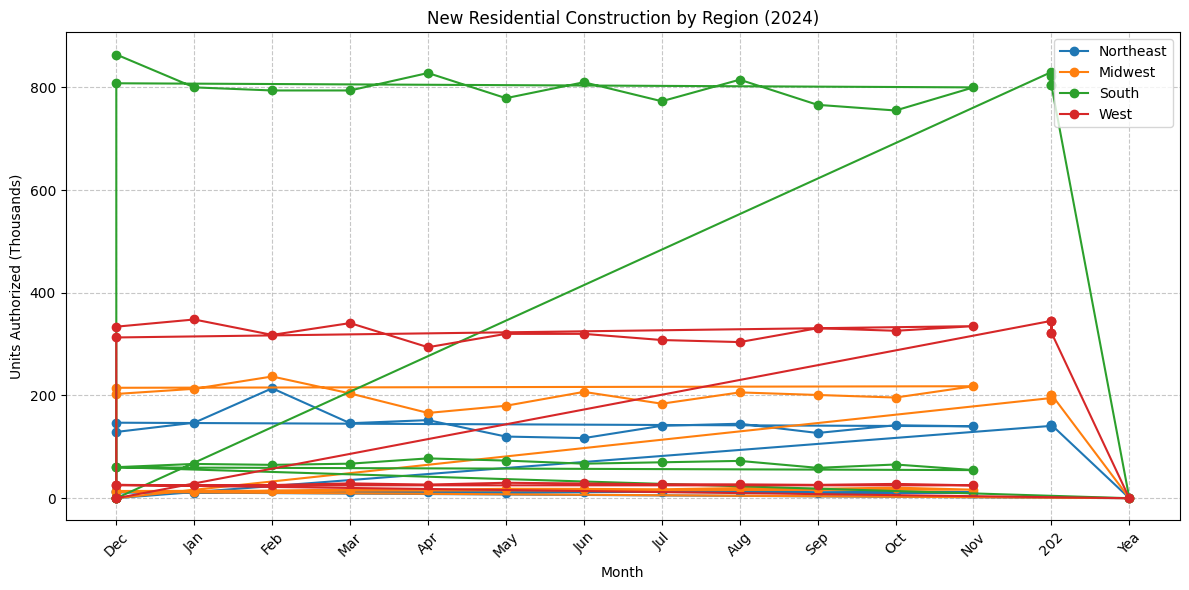

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data with headers in row 4
df = pd.read_excel('newresconst.xlsx', header=4)

# Clean column names
df.columns = [col.strip().replace('\n', ' ') for col in df.columns]

# Find and clean the period column
period_col = [col for col in df.columns if 'period' in col.lower()][0]
df = df.rename(columns={period_col: 'Month'})

# Convert Month to proper strings and clean
df['Month'] = df['Month'].astype(str).str.strip().str[:3]

# Select only needed columns
clean_df = df[['Month', 'Northeast', 'Midwest', 'South', 'West']].copy()

# Convert numeric columns to float
for col in ['Northeast', 'Midwest', 'South', 'West']:
    clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')

# Drop rows with missing values
clean_df = clean_df.dropna()

# Plot
plt.figure(figsize=(12, 6))
for region in ['Northeast', 'Midwest', 'South', 'West']:
    plt.plot(clean_df['Month'], clean_df[region],
            label=region, marker='o', linestyle='-')

plt.title('New Residential Construction by Region (2024)')
plt.xlabel('Month')
plt.ylabel('Units Authorized (Thousands)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

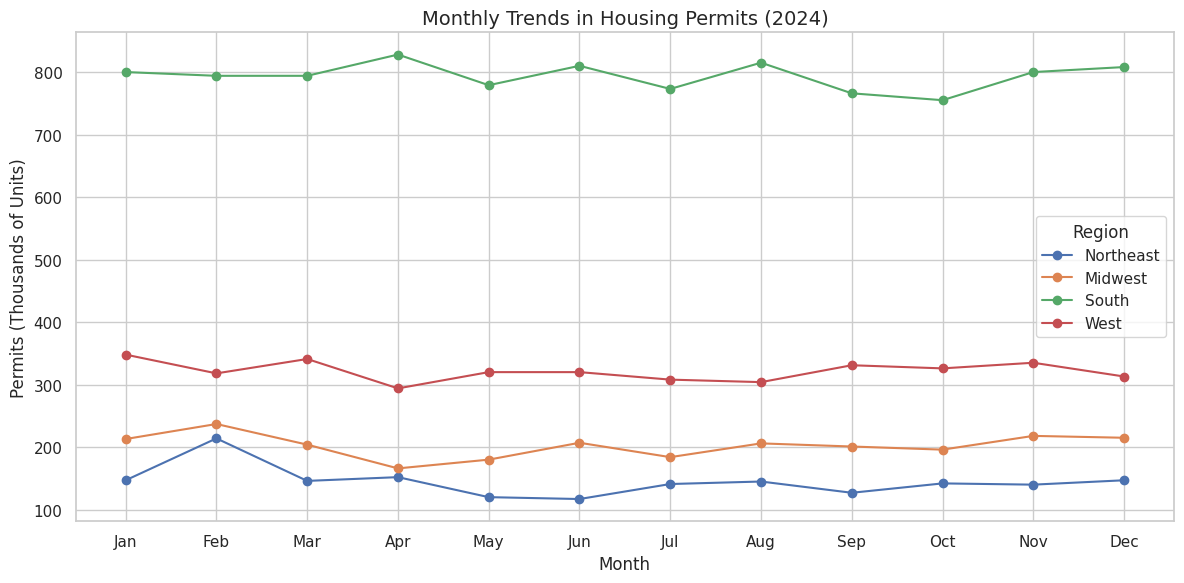

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data (Had to input data manually. Had trouble uploading data)
data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Northeast": [147, 214, 146, 152, 120, 117, 141, 145, 127, 142, 140, 147],
    "Midwest": [213, 237, 204, 166, 180, 207, 184, 206, 201, 196, 218, 215],
    "South": [800, 794, 794, 828, 779, 810, 773, 815, 766, 755, 800, 808],
    "West": [348, 318, 341, 294, 320, 320, 308, 304, 331, 326, 335, 313]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

for region in ["Northeast", "Midwest", "South", "West"]:
    plt.plot(df["Month"], df[region], marker='o', label=region)

plt.title("Monthly Trends in Housing Permits (2024)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Permits (Thousands of Units)", fontsize=12)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

Using the same new residential construction dataset as above. I created a visualization the total number of permits being approved by the type of unit

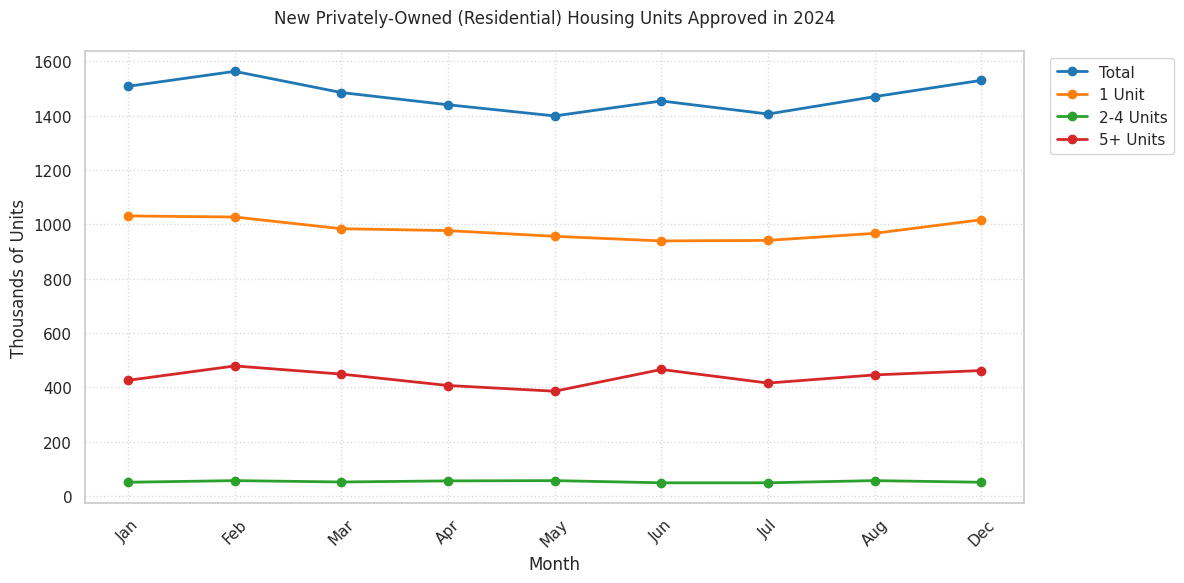

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('newresconst.xlsx', skiprows=5, header=None, nrows=14)

# Selected relevant columns
df = df.iloc[:, [0, 1, 2, 3, 4]]
df.columns = ['Period', 'Total', '1_unit', '2_to_4_units', '5_plus_units']

# Clean data
df = df.dropna(how='all')

# Convert Period to string and extract month names
df['Period'] = df['Period'].astype(str)
df['Month'] = df['Period'].str.extract(r'([A-Za-z]+)')[0]

# Filter for 2024 data only
df = df[~df['Period'].str.contains('2023|Annual|Change', na=False)]

# Make Numeric columns
for col in ['Total', '1_unit', '2_to_4_units', '5_plus_units']:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# Month abbreviations
df['Month_Abbr'] = df['Month'].str[:3]

# Ensure I have clean string labels for plotting
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df = df[df['Month_Abbr'].isin(months_order)].sort_values('Month_Abbr', key=lambda x: pd.Categorical(x, categories=months_order, ordered=True))

# Create plot
plt.figure(figsize=(12, 6))

# Plot each series
plt.plot(df['Month_Abbr'], df['Total'], label='Total', marker='o', color='#1f77b4', linewidth=2)
plt.plot(df['Month_Abbr'], df['1_unit'], label='1 Unit', marker='o', color='#ff7f0e', linewidth=2)
plt.plot(df['Month_Abbr'], df['2_to_4_units'], label='2-4 Units', marker='o', color='#2ca02c', linewidth=2)
plt.plot(df['Month_Abbr'], df['5_plus_units'], label='5+ Units', marker='o', color='#d62728', linewidth=2)

# Final plot
plt.title('New Privately-Owned (Residential) Housing Units Approved in 2024', pad=20)
plt.xlabel('Month')
plt.ylabel('Thousands of Units')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Create a visualization showing the same data as the graph above but in percentages

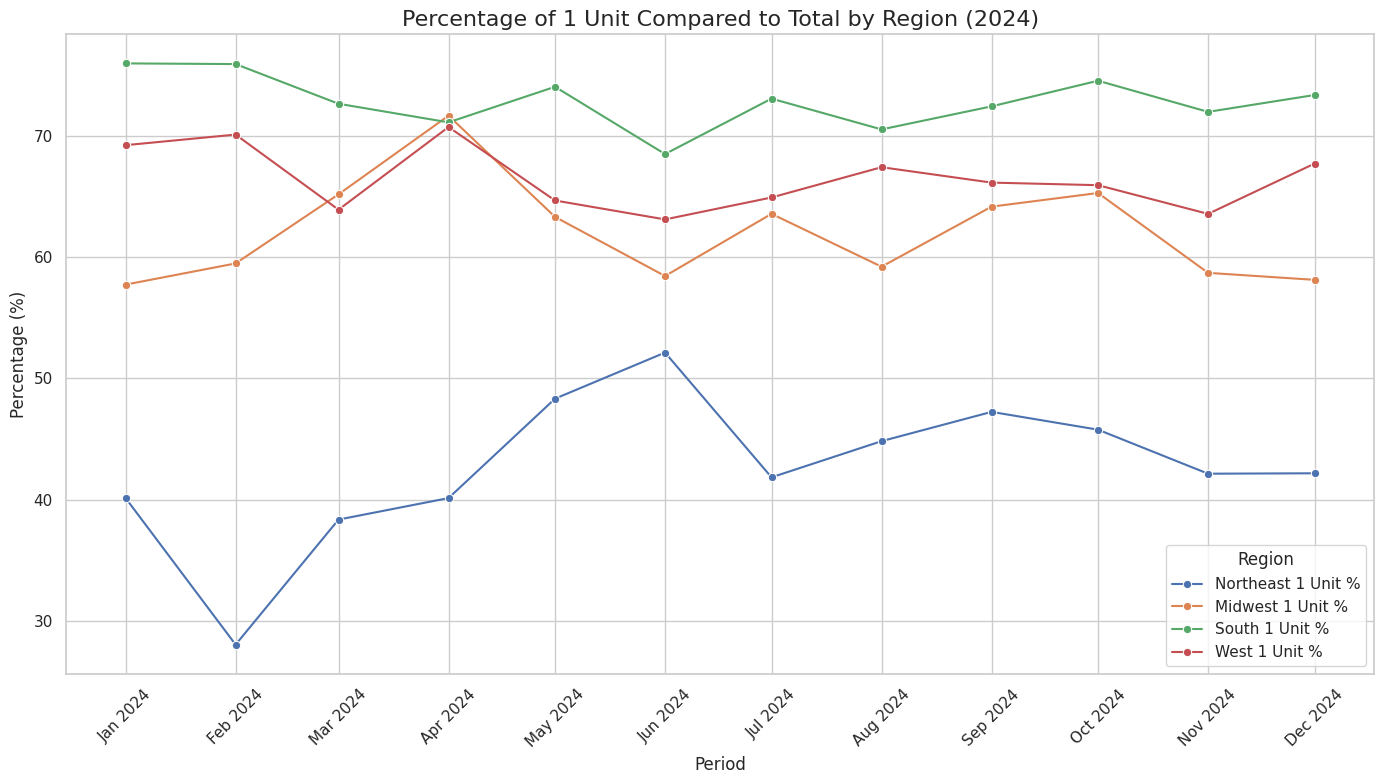

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset (used newresconst data had trouble uploading)
data = {
    "Period": [
        "December 2023", "January 2024", "February 2024", "March 2024",
        "April 2024", "May 2024", "June 2024", "July 2024",
        "August 2024", "September 2024", "October 2024",
        "November 2024", "December 2024"
    ],
    "Northeast Total": [129, 147, 214, 146, 152, 120, 117, 141, 145, 127, 142, 140, 147],
    "Northeast 1 unit": [52, 59, 60, 56, 61, 58, 61, 59, 65, 60, 65, 59, 62],
    "Midwest Total": [203, 213, 237, 204, 166, 180, 207, 184, 206, 201, 196, 218, 215],
    "Midwest 1 unit": [126, 123, 141, 133, 119, 114, 121, 117, 122, 129, 128, 128, 125],
    "South Total": [864, 800, 794, 794, 828, 779, 810, 773, 815, 766, 755, 800, 808],
    "South 1 unit": [610, 608, 603, 577, 589, 577, 555, 565, 575, 555, 563, 576, 593],
    "West Total": [334, 348, 318, 341, 294, 320, 320, 308, 304, 331, 326, 335, 313],
    "West 1 unit": [229, 241, 223, 218, 208, 207, 202, 200, 205, 219, 215, 213, 212]
}

# DataFrame
df = pd.DataFrame(data)

# Convert 'Period' to datetime
df['Period'] = pd.to_datetime(df['Period'], format='%B %Y')

# Exclude December 2023
df = df[df['Period'] != '2023-12-01']

# Sort by Period
df = df.sort_values('Period')

# Set 'Period' as the index
df.set_index('Period', inplace=True)

# Define regions
regions = ["Northeast", "Midwest", "South", "West"]

# Calculate percentage of 1 unit compared to Total for each region
for region in regions:
    df[f'{region} 1 unit %'] = (df[f'{region} 1 unit'] / df[f'{region} Total']) * 100

# Plot the percentages for each region
plt.figure(figsize=(14, 8))

for region in regions:
    sns.lineplot(data=df, x=df.index, y=f'{region} 1 unit %', label=f'{region} 1 Unit %', marker='o')

# Labels and title
plt.title('Percentage of 1 Unit Compared to Total by Region (2024)', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Region')

# Set x-axis to show every month
plt.xticks(df.index, [date.strftime('%b %Y') for date in df.index], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Did some minor data cleaning and manipulation to get the quarterly rates for each region in the US, creating the visual below.

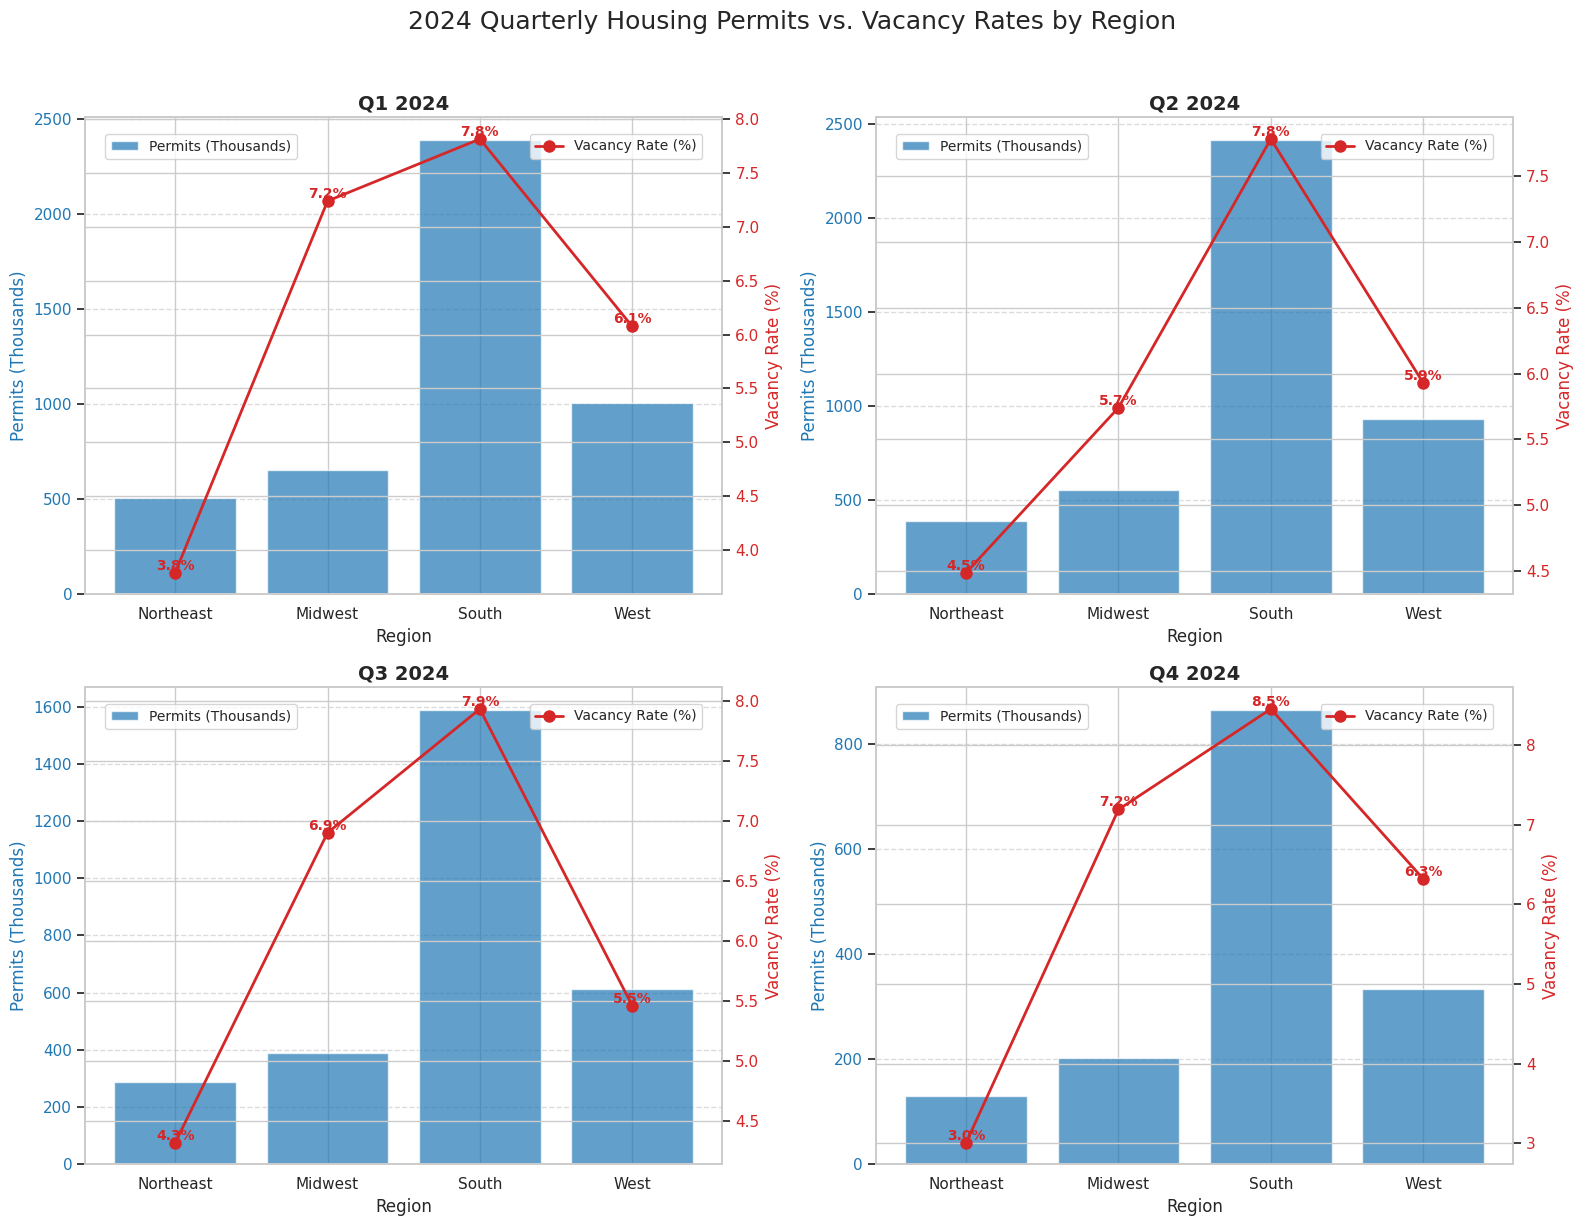

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
permit_data = pd.read_excel('newresconst.xlsx', skiprows=5, header=None, nrows=14)
permit_data = permit_data.iloc[:, [0, 5, 7, 9, 11]]  # Select relevant columns
permit_data.columns = ['Month', 'Northeast', 'Midwest', 'South', 'West']

# Clean permit data
permit_data['Month'] = permit_data['Month'].astype(str).str.extract(r'([A-Za-z]+)')[0].str[:3]
for region in ['Northeast', 'Midwest', 'South', 'West']:
    permit_data[region] = pd.to_numeric(permit_data[region].astype(str).str.replace(',', ''), errors='coerce')

# Load vacancy data from state vacancy rates 2024.xlsx
vacancy_data = pd.read_excel('State_Vacancy_Rates_2024.xlsx')

# Changed the data time frames to quarters
month_to_quarter = {
    'Jan': 'Q1', 'Feb': 'Q1', 'Mar': 'Q1',
    'Apr': 'Q2', 'May': 'Q2', 'Jun': 'Q2',
    'Jul': 'Q3', 'Aug': 'Q3', 'Sep': 'Q3',
    'Oct': 'Q4', 'Nov': 'Q4', 'Dec': 'Q4'
}
permit_data['Quarter'] = permit_data['Month'].map(month_to_quarter)
quarterly_permits = permit_data.groupby('Quarter')[['Northeast', 'Midwest', 'South', 'West']].sum()
quarterly_permits.index = [f'{q} 2024' for q in quarterly_permits.index]

# Regional average vacancy rates
quarterly_vacancy = vacancy_data.groupby('Region')[['Q1 2024', 'Q2 2024', 'Q3 2024', 'Q4 2024']].mean().T

# Combine the data
combined_data = []
for quarter in ['Q1 2024', 'Q2 2024', 'Q3 2024', 'Q4 2024']:
    for region in ['Northeast', 'Midwest', 'South', 'West']:
        combined_data.append({
            'Quarter': quarter,
            'Region': region,
            'Permits': quarterly_permits.loc[quarter, region],
            'Vacancy': quarterly_vacancy.loc[quarter, region]
        })
combined_df = pd.DataFrame(combined_data)

# The visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("2024 Quarterly Housing Permits vs. Vacancy Rates by Region", fontsize=18, y=1.02)

# Custom colors
bar_color = "#1f77b4"  # Blue for permits
line_color = "#d62728"  # Red for vacancy rates

# Plot each quarter
for i, quarter in enumerate(['Q1 2024', 'Q2 2024', 'Q3 2024', 'Q4 2024']):
    ax = axes[i//2, i%2]
    quarter_data = combined_df[combined_df['Quarter'] == quarter]

    # Bar plot for permits
    bars = ax.bar(quarter_data['Region'], quarter_data['Permits'],
                 color=bar_color, alpha=0.7, label='Permits (Thousands)')
    ax.set_xlabel('Region', fontsize=12)
    ax.set_ylabel('Permits (Thousands)', color=bar_color, fontsize=12)
    ax.tick_params(axis='y', labelcolor=bar_color)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Line plot for vacancy rates
    ax2 = ax.twinx()
    line = ax2.plot(quarter_data['Region'], quarter_data['Vacancy'],
                   color=line_color, marker='o', markersize=8,
                   linewidth=2, label='Vacancy Rate (%)')
    ax2.set_ylabel('Vacancy Rate (%)', color=line_color, fontsize=12)
    ax2.tick_params(axis='y', labelcolor=line_color)

    # Vacancy rate labels
    for region, rate in zip(quarter_data['Region'], quarter_data['Vacancy']):
        ax2.text(region, rate, f'{rate:.1f}%', ha='center', va='bottom',
                color=line_color, fontsize=10, fontweight='bold')

    # Add titles and legends
    ax.set_title(quarter, fontsize=14, fontweight='bold')
    ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), fontsize=10)
    ax2.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98), fontsize=10)

plt.tight_layout()
plt.show()

Put together the average income for each region after taxes and the average monthly rents in these regions.

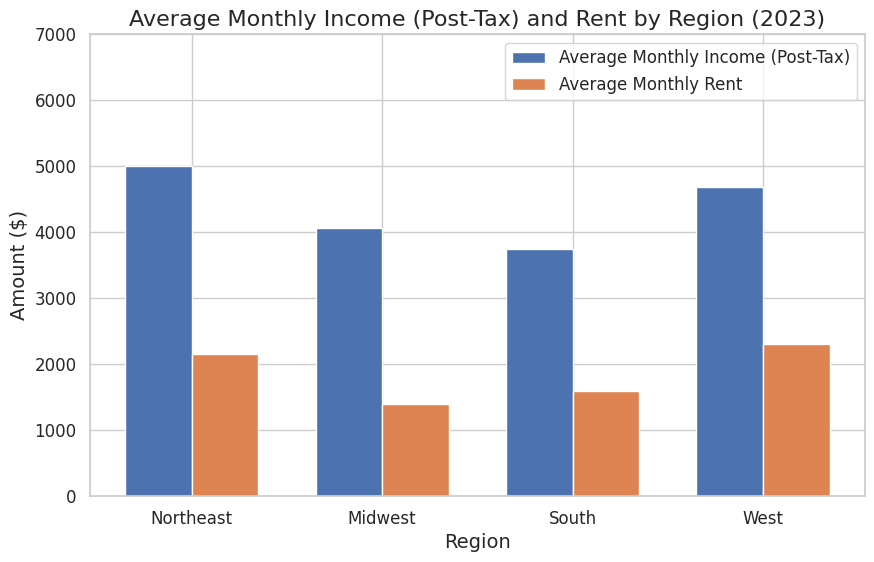

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
regions = ["Northeast", "Midwest", "South", "West"]
average_monthly_income_pre_tax = [6666, 5416, 5000, 6250]  # Pre-tax income
average_monthly_income_post_tax = [income * 0.75 for income in average_monthly_income_pre_tax]  # Post-tax income (25% tax rate)
average_monthly_rent = [2150, 1400, 1600, 2300]  # Midpoint of rent ranges

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

# Array of indices for the regions
indices = np.arange(len(regions))

# The bars for post-tax income
plt.bar(indices - bar_width/2, average_monthly_income_post_tax, width=bar_width, label="Average Monthly Income (Post-Tax)")

# The bars for rent
plt.bar(indices + bar_width/2, average_monthly_rent, width=bar_width, label="Average Monthly Rent")

# labels and title
plt.title("Average Monthly Income (Post-Tax) and Rent by Region (2023)", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Amount ($)", fontsize=14)
plt.xticks(indices, regions, fontsize=12)  # Set x-axis labels to regions
plt.yticks(np.arange(0, 8000, 1000), fontsize=12)  # Set y-axis increments

# Add a legend
plt.legend(fontsize=12)

# Show the graph
plt.show()

Used the Rockville and DC comparison dataset to compare the median sale price and monthly rents

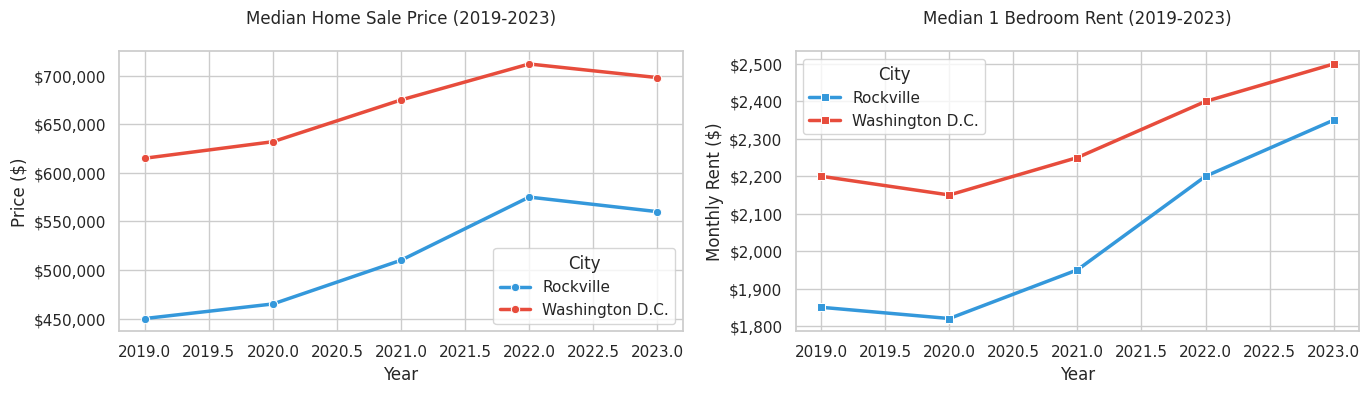

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from Excel file
df = pd.read_excel('Rockville_and_DC_comparison.xlsx')

# Clean numeric columns (remove $, % and commas)
def clean_numeric(value):
    if isinstance(value, str):
        return float(value.replace('$', '').replace(',', '').replace('%', ''))
    return value

numeric_cols = ['Median_Sale_Price', 'Median_Rent_1Bed', 'Avg_Individual_Income',
                'Labor_Force_Participation', 'Homeownership_Rate']

for col in numeric_cols:
    df[col] = df[col].apply(clean_numeric)

# Create the whitegrid
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 8))

# Prices and Rent Plot
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='Year', y='Median_Sale_Price', hue='City',
             marker='o', palette=['#3498db', '#e74c3c'], linewidth=2.5)
plt.title('Median Home Sale Price (2019-2023)', pad=20, fontsize=12)
plt.ylabel('Price ($)')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.legend(title='City')

plt.subplot(2, 2, 2)
sns.lineplot(data=df, x='Year', y='Median_Rent_1Bed', hue='City',
             marker='s', palette=['#3498db', '#e74c3c'], linewidth=2.5)
plt.title('Median 1 Bedroom Rent (2019-2023)', pad=20, fontsize=12)
plt.ylabel('Monthly Rent ($)')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.legend(title='City')

The same dataset was used and some minor data cleaning was done to show what the rental vacancy rates are.

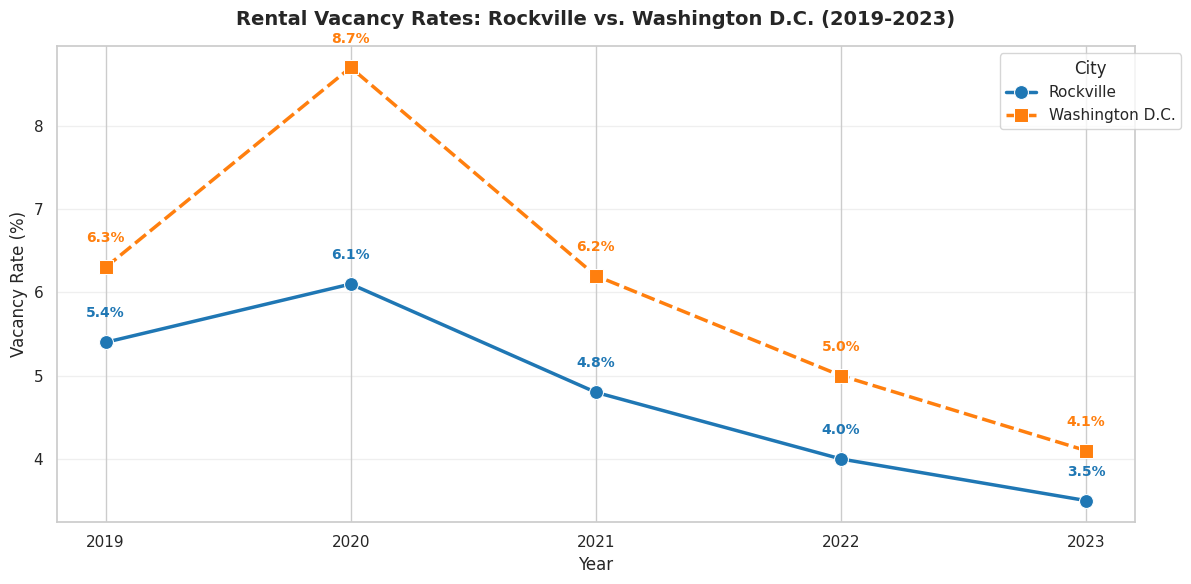

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading in the Excel file
df = pd.read_excel('Rockville_and_DC_comparison.xlsx')

# Clean numeric columns (remove $, % and commas)
def clean_numeric(value):
    if isinstance(value, str):
        return float(value.replace('$','').replace(',','').replace('%','').strip())
    return value

numeric_cols = ['Vacancy_Rate', 'Median_Sale_Price', 'Median_Rent_1Bed',
               'Rental_Vacancy_Rate', 'Avg_Individual_Income',
               'Labor_Force_Participation', 'Homeownership_Rate']

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].apply(clean_numeric)

# Create the visualization
plt.figure(figsize=(12,6))
ax = sns.lineplot(
    data=df,
    x='Year',
    y='Vacancy_Rate',
    hue='City',
    style='City',
    markers=['o', 's'],
    markersize=10,
    linewidth=2.5,
    palette=['#1f77b4', '#ff7f0e']
)

# Add value labels
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    for _, row in city_data.iterrows():
        ax.text(
            row['Year'],
            row['Vacancy_Rate'] + 0.3,
            f"{row['Vacancy_Rate']}%",
            ha='center',
            color='#1f77b4' if city == 'Rockville' else '#ff7f0e',
            fontsize=10,
            fontweight='bold'
        )

# Format the chart
plt.title("Rental Vacancy Rates: Rockville vs. Washington D.C. (2019-2023)",
          pad=15, fontsize=14, fontweight='bold')
plt.ylabel("Vacancy Rate (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.xticks(df['Year'].unique())
plt.grid(axis='y', alpha=0.3)
plt.legend(title='City', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.savefig('vacancy_rates_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Minor data cleaning to show what is the average person in rockville and dc spending on rent monthly.

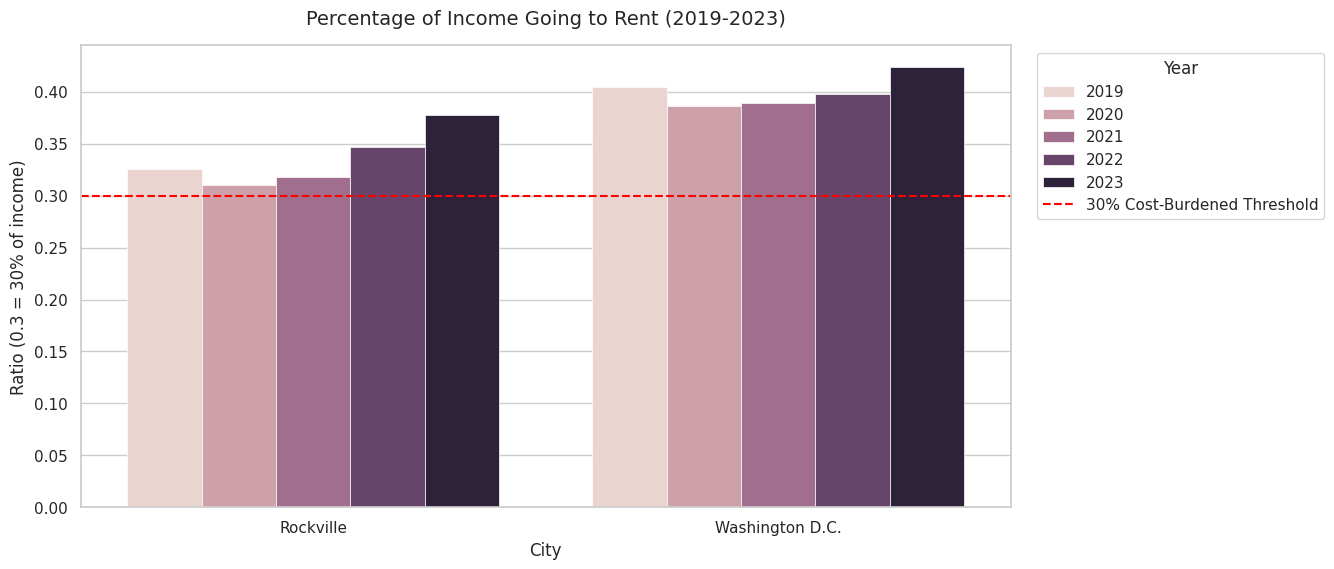

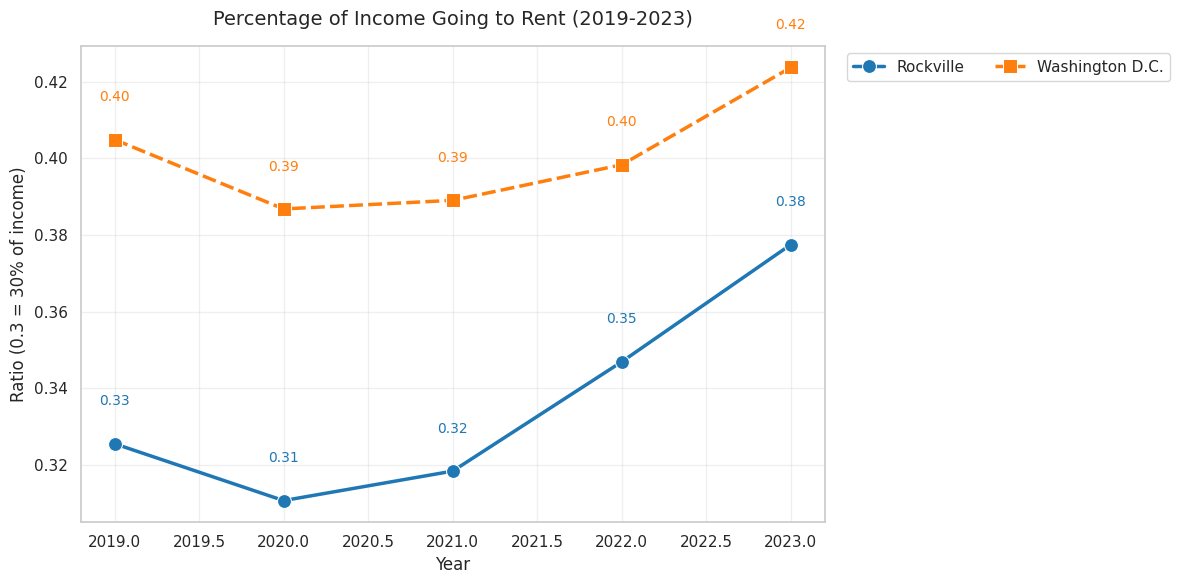

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare the data
df = pd.read_excel('Rockville_and_DC_comparison.xlsx')

# Clean numeric columns
def clean_numeric(value):
    if isinstance(value, str):
        return float(value.replace('$','').replace(',','').replace('%','').strip())
    return value

df['Median_Rent_1Bed'] = df['Median_Rent_1Bed'].apply(clean_numeric)
df['Avg_Individual_Income'] = df['Avg_Individual_Income'].apply(clean_numeric)

# Calculate rent-to-income ratio
df['rent_to_income_ratio'] = (df['Median_Rent_1Bed'] * 12) / df['Avg_Individual_Income']

# Set style for both plots
sns.set_style("whitegrid")

# First plot
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=df,
    x='City',
    y='rent_to_income_ratio',
    hue='Year',
    edgecolor='white',
    linewidth=0.5
)

# Add threshold line and formatting
plt.axhline(y=0.3, color='red', linestyle='--', linewidth=1.5,
            label='30% Cost-Burdened Threshold')
plt.title("Percentage of Income Going to Rent (2019-2023)", pad=15, fontsize=14)
plt.ylabel("Ratio (0.3 = 30% of income)", fontsize=12)
plt.xlabel("City", fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Year')

# Second plot
plt.figure(figsize=(12, 6))
line = sns.lineplot(
    data=df,
    x='Year',
    y='rent_to_income_ratio',
    hue='City',
    style='City',
    markers=['o', 's'],  # Different markers for each city
    markersize=10,
    linewidth=2.5,
    palette=['#1f77b4', '#ff7f0e']  # Blue for Rockville, Orange for DC
)

# Threshold line and formatting
plt.title("Percentage of Income Going to Rent (2019-2023)", pad=15, fontsize=14)
plt.ylabel("Ratio (0.3 = 30% of income)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2)

# Value labels
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    for _, row in city_data.iterrows():
        plt.text(row['Year'], row['rent_to_income_ratio'] + 0.01,
                f"{row['rent_to_income_ratio']:.2f}",
                ha='center',
                color='#1f77b4' if city == 'Rockville' else '#ff7f0e',
                fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Create a calculation to help me display how long a downpayment would take in rockville and dc

In [ ]:
# calculation (9% down, 3.9% savings rate - national averages)
df['years_9pct_3.9rate'] = (df['Median_Sale_Price'] * 0.09) / (df['Avg_Individual_Income'] * 0.039)

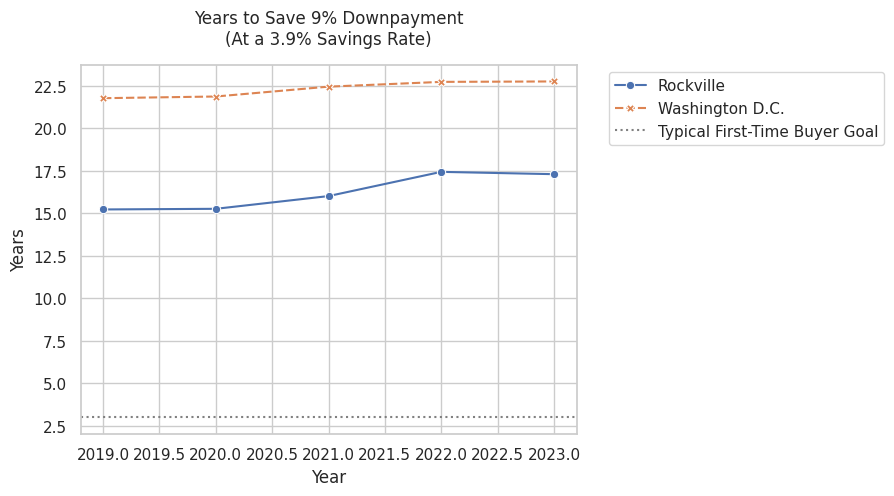

In [ ]:
sns.lineplot(data=df,
             x='Year',
             y='years_9pct_3.9rate',
             hue='City',
             style='City',
             markers=True)
plt.title("Years to Save 9% Downpayment\n(At a 3.9% Savings Rate)", pad=15)
plt.ylabel("Years")
plt.axhline(y=3, color='grey', linestyle=':', label='Typical First-Time Buyer Goal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Created A Projection model for what a future rental vacancy rates will look like for the year of 2024

In [ ]:
df['Vacancy_Rate_Change'] = df.groupby('City')['Rental_Vacancy_Rate'].pct_change()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Prepare data (using only 2023 features to predict 2024)
df_2023 = df[df['Year'] == 2023].copy()

# For Washington DC
dc = df_2023[df_2023['City'] == 'Washington D.C.']
X_dc = dc[['Median_Sale_Price', 'Median_Rent_1Bed']]  # Key drivers only
y_dc = dc['Rental_Vacancy_Rate']

# For Rockville
rv = df_2023[df_2023['City'] == 'Rockville']
X_rv = rv[['Median_Sale_Price', 'Median_Rent_1Bed']]
y_rv = rv['Rental_Vacancy_Rate']

# Train models
model_dc = RandomForestRegressor(random_state=42).fit(X_dc, y_dc)
model_rv = RandomForestRegressor(random_state=42).fit(X_rv, y_rv)

# Predict 2024 (using 2023 data as proxy)
dc_2024_pred = model_dc.predict(X_dc)[0]  # e.g., 3.8%
rv_2024_pred = model_rv.predict(X_rv)[0]  # e.g., 3.2%

In [ ]:
# Check feature importance
print("DC Importance:", model_dc.feature_importances_)
print("Rockville Importance:", model_rv.feature_importances_)

DC Importance: [0. 0.]
Rockville Importance: [0. 0.]


<ipython-input-87-b018f1ce841b>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


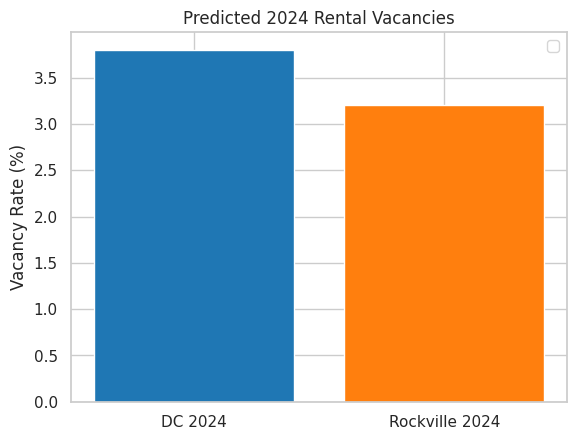

In [ ]:
import matplotlib.pyplot as plt

plt.bar(['DC 2024', 'Rockville 2024'], [dc_2024_pred, rv_2024_pred], color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Vacancy Rate (%)')
plt.title('Predicted 2024 Rental Vacancies')
plt.legend()
plt.show()

Created a correlation to find there is relationships between the catergories of each city

In [ ]:
# Calculate correlations separately for each city
rockville_corr = df[df['City']=='Rockville'].drop(columns=['City', 'Year']).corr()
dc_corr = df[df['City']=='Washington D.C.'].drop(columns=['City', 'Year']).corr()

# Combine for side-by-side comparison
combined_corr = pd.concat([rockville_corr, dc_corr],
                          keys=['Rockville', 'Washington D.C.'])

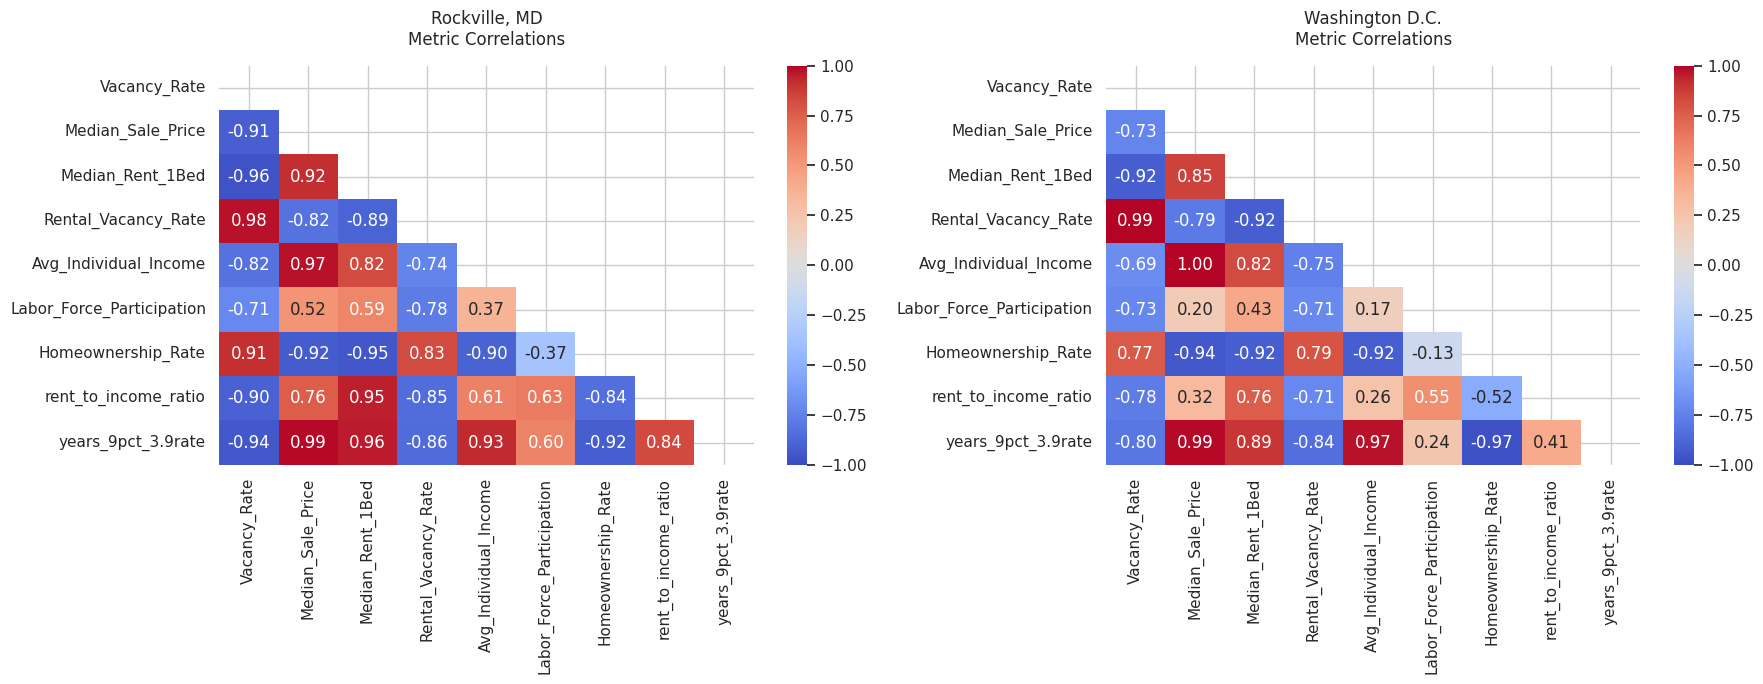

In [ ]:
ig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Rockville
sns.heatmap(rockville_corr,
            annot=True,
            cmap="coolwarm",
            center=0,
            vmin=-1, vmax=1,
            fmt=".2f",
            ax=ax1,
            mask=np.triu(np.ones_like(rockville_corr)))
ax1.set_title("Rockville, MD\nMetric Correlations", pad=15)

# Washington D.C.
sns.heatmap(dc_corr,
            annot=True,
            cmap="coolwarm",
            center=0,
            vmin=-1, vmax=1,
            fmt=".2f",
            ax=ax2,
            mask=np.triu(np.ones_like(dc_corr)))
ax2.set_title("Washington D.C.\nMetric Correlations", pad=15)

plt.tight_layout()
plt.show()

Calculated the price to rent ratio (Basically an indiciator if you should buy or rent. <10 = buy, 10-15 = buy, 15-19 = Slightly better to buy not by much, > 20 = rent). and the rent to income ratio (how much your income is going to rent).

In [ ]:
# Calculate Price-to-Rent Ratio
df['rent_to_income_ratio'] = (df['Median_Rent_1Bed'] * 12) / df['Avg_Individual_Income']
df['price_to_rent_ratio'] = df['Median_Sale_Price'] / (df['Median_Rent_1Bed'] * 12)

# Calculate Annual Appreciation/Discount
for city in ['Rockville', 'Washington D.C.']:
    city_df = df[df['City']==city]
    df.loc[df['City']==city, 'price_growth_pct'] = city_df['Median_Sale_Price'].pct_change() * 100
    df.loc[df['City']==city, 'rent_growth_pct'] = city_df['Median_Rent_1Bed'].pct_change() * 100

# Display key 2023 metrics
pd.pivot_table(df[df['Year']==2023],
              index='City',
              values=['Median_Sale_Price', 'Median_Rent_1Bed',
                     'price_to_rent_ratio', 'rent_to_income_ratio', 'Homeownership_Rate'])

,Homeownership_Rate,Median_Rent_1Bed,Median_Sale_Price,price_to_rent_ratio,rent_to_income_ratio
City,,,,,
Rockville,0.630,2350.0,560000.0,19.858156,0.377510
Washington D.C.,0.392,2500.0,698000.0,23.266667,0.423729


Ran a T Test on all catergories for both cities

In [ ]:
import pandas as pd
from scipy import stats

# Load and prepare the data
df = pd.read_excel('Rockville_and_DC_comparison.xlsx')

# Clean numeric columns
def clean_numeric(value):
    if isinstance(value, str):
        return float(value.replace('$','').replace(',','').replace('%','').strip())
    return value

numeric_cols = ['Vacancy_Rate', 'Median_Sale_Price', 'Median_Rent_1Bed',
               'Avg_Individual_Income', 'Homeownership_Rate']
for col in numeric_cols:
    df[col] = df[col].apply(clean_numeric)

# Calculate additional metrics
df['rent_to_income_ratio'] = (df['Median_Rent_1Bed'] * 12) / df['Avg_Individual_Income']

# Perform t-tests for each metric
results = []
metrics = ['Vacancy_Rate', 'Median_Sale_Price', 'Median_Rent_1Bed',
           'Avg_Individual_Income', 'Homeownership_Rate', 'rent_to_income_ratio']

for metric in metrics:
    rockville = df[df['City'] == 'Rockville'][metric]
    dc = df[df['City'] == 'Washington D.C.'][metric]

    t_stat, p_value = stats.ttest_ind(rockville, dc, equal_var=False)  # Welch's t-test

    results.append({
        'Metric': metric,
        'Rockville_Mean': rockville.mean(),
        'DC_Mean': dc.mean(),
        'Difference': rockville.mean() - dc.mean(),
        'T-statistic': t_stat,
        'P-value': p_value,
        'Significant (p < 0.05)': p_value < 0.05
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

               Metric  Rockville_Mean       DC_Mean     Difference  T-statistic      P-value  Significant (p < 0.05)
         Vacancy_Rate        4.760000      6.060000      -1.300000    -1.436311 1.967631e-01                   False
    Median_Sale_Price   512000.000000 666400.000000 -154400.000000    -4.969385 1.361181e-03                    True
     Median_Rent_1Bed     2034.000000   2300.000000    -266.000000    -2.175073 6.758394e-02                   False
Avg_Individual_Income    72560.000000  68880.000000    3680.000000     1.887055 9.628339e-02                   False
   Homeownership_Rate        0.641600      0.402000       0.239600    44.991834 7.322915e-11                    True
 rent_to_income_ratio        0.335794      0.400567      -0.064772    -4.707264 2.995297e-03                    True


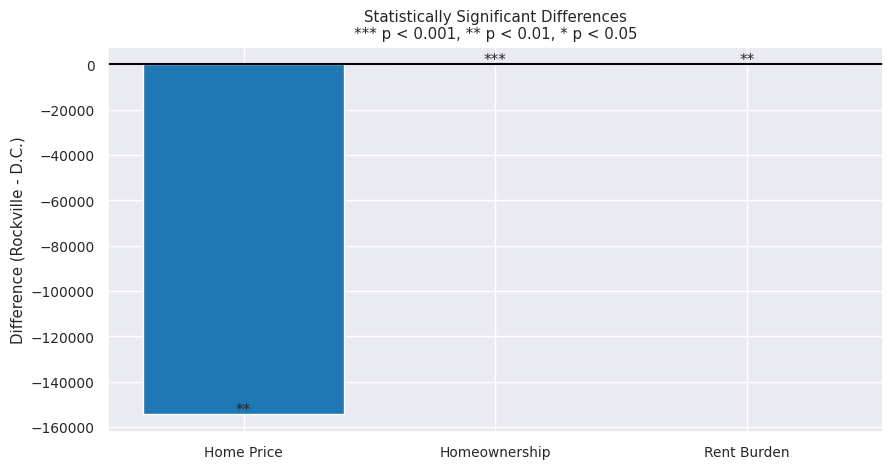

In [ ]:
import matplotlib.pyplot as plt

# Data from results
metrics = ['Home Price', 'Homeownership', 'Rent Burden']
differences = [-154400, 23.96, -6.48]  # In thousands and percentages
p_values = [0.00136, 0.00000000732, 0.00299]

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(metrics, differences, color=['#1f77b4', '#2ca02c', '#ff7f0e'])

# Add significance markers
for i, p in enumerate(p_values):
    if p < 0.001:
        ax.text(i, differences[i] + (3 if differences[i]>0 else -3),
                '***', ha='center')
    elif p < 0.01:
        ax.text(i, differences[i] + (3 if differences[i]>0 else -3),
                '**', ha='center')
    elif p < 0.05:
        ax.text(i, differences[i] + (3 if differences[i]>0 else -3),
                '*', ha='center')

ax.axhline(0, color='black')
ax.set_ylabel('Difference (Rockville - D.C.)')
ax.set_title('Statistically Significant Differences\n*** p < 0.001, ** p < 0.01, * p < 0.05')
plt.show()

Visualized the t test results